In [70]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import glob
from sklearn.model_selection import train_test_split
from testCases_v2 import *

%matplotlib inline

### Load Car Dataset

In [71]:

# car dataset
def load_dataset(database_path):
    # open dataset 
    dataset_db = h5py.File(database_path, "r")
    
    
    datasets = {}
    for dataset in ["train", "dev", "test"]:
        
        # load the train set feautres (picuture)
        datasets[dataset] = {'X' : np.array(dataset_db[dataset + "_img"][:]),  # dataset features
                              'Y' : np.array(dataset_db[dataset + "_labels"][:]) # dataset labels
                           }
    #load data
    X_train = np.array(datasets['train']['X'])
    X_test = np.array(datasets['test']['X'])
    y_train = np.array(datasets['train']['Y'])
    y_test =np.array(datasets['test']['Y'])
    X_dev = np.array(datasets['dev']['X'])
    y_dev = np.array(datasets['dev']['Y'])
    
    return X_train, X_test, y_train, y_test, X_dev, y_dev

def load_data(database_path):
    # open dataset 
    dataset = h5py.File(database_path, "r")
    
    
        
        # load the train set feautres (picuture)
        
    X_train = np.array(dataset['train_img'] [:])
    
    X_test = np.array(dataset['test_img'][:])
    y_train = np.array(dataset['train_labels'][:])
    y_test =np.array(dataset['test_labels'][:])
    X_dev = np.array(dataset['dev_img'][:])
    y_dev = np.array(dataset['dev_labels'][:])
    return X_train, X_test, y_train, y_test, X_dev, y_dev        



In [72]:
num_pix = 64
#Car dataset
X_train, X_test, y_train, y_test, X_dev, y_dev= load_data("car_dataset.hdf5")

#X_train, X_test, y_train, y_test, X_dev, y_dev= load_dataset("car_dataset.hdf5")
# load the train_set_x_orig, test_set_x_orig, train_set_y, test_set_y

pass

In [73]:
print("Number of training examples: " + str(len(X_train)))

print("Number of testing examples: " + str(len(X_test)))

print("Height/ Width of each image: " + str(num_pix))

print("train_set_x shape: "+ str(X_train.shape))

print("train_set_y shape: "+ str(y_train.shape))

print("test_set_x shape: "+ str(X_test.shape))

print("test_set_y shape: "+ str(y_test.shape))


print("dev_set_x shape: "+ str(X_dev.shape))

print("dev_set_y shape: "+ str(y_dev.shape))

Number of training examples: 517
Number of testing examples: 173
Height/ Width of each image: 64
train_set_x shape: (517, 64, 64, 3)
train_set_y shape: (517,)
test_set_x shape: (173, 64, 64, 3)
test_set_y shape: (173,)
dev_set_x shape: (172, 64, 64, 3)
dev_set_y shape: (172,)


In [74]:
train_set_of_y= y_train.reshape(y_train.shape[0], -1).T
test_set_of_y=y_test.reshape(y_test.shape[0], -1).T
# your code here <end>


dev_set_of_y= y_dev.reshape(y_dev.shape[0], -1).T


#train_set_y1= y_train1.reshape(y_train1.shape[0], -1).T
#test_set_y1=y_test1.reshape(y_test1.shape[0], -1).T

print ("train_set_of_y shape: " + str(train_set_of_y.shape))
print ("test_set_of_y shape: " + str(test_set_of_y.shape))

print ("dev_set_of_y shape: " + str(dev_set_of_y.shape))

train_set_of_y shape: (1, 517)
test_set_of_y shape: (1, 173)
dev_set_of_y shape: (1, 172)


In [75]:
train_set_of_x_flatten =X_train.reshape(X_train.shape[0], -1).T

test_set_of_x_flatten=X_test.reshape(X_test.shape[0], -1).T

dev_set_of_x_flatten=X_dev.flatten().reshape(X_dev.shape[0], -1).T

print("train_set_x_flatten (shape):"+ str(train_set_of_x_flatten.shape))

print("test_set_x_flatten (shape): "+ str(test_set_of_x_flatten.shape))

print("dev_set_x_flatten (shape): "+ str(dev_set_of_x_flatten.shape))


train_set_x_flatten (shape):(12288, 517)
test_set_x_flatten (shape): (12288, 173)
dev_set_x_flatten (shape): (12288, 172)


In [76]:
std_X_train= train_set_of_x_flatten/255
std_X_test= test_set_of_x_flatten/255
std_X_dev= dev_set_of_x_flatten/255


### Logistic Regression

In [77]:
def sigmoid(z):
    sig= 1 / (1 + np.exp(-z))
    return sig

In [78]:
def initialize_with_zeros(dim):
    w= np.zeros((dim,1))
    b= 0.0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [79]:
def forward_propagate(w, b,X, Y):
    m= X.shape[1]
    
    Z=np.dot(w.T, X) + b
    
    A= sigmoid(Z)
    
    #cost function
    cost= (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    return A, cost


In [80]:
def backward_prop(w, b, X, Y):
    
    Z=np.dot(w.T, X) + b
    A= sigmoid(Z)
    m= X.shape[1]
    A, cost = forward_propagate(w,b,X,Y)
    dz= A - Y
    dw= (1/m) * np.dot(X, dz.T)
    db= (1/m) * np.sum(dz)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads= {"dw": dw,
           "db": db}
    
    return grads, cost

In [81]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost= False):
    
    costs= []
    for i in range(num_iterations):
        grads, cost= backward_prop(w, b, X, Y)
        dw= grads['dw']
        db= grads['db']
    
        w= w- learning_rate * dw
        b= b- learning_rate * db
    
        if i % 100 == 0:
            costs.append(cost)
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    
    return params, grads, costs
    

In [82]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    Z = np.dot(w.T, X) + b
    
    A = sigmoid(Z)
   
    Y_prediction = np.around(A) 
    #for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
     #   Y_prediction = np.around(A[0, i])
        
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction
    

In [83]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost = True):
    
    n= X_train.shape[0]
    w, b = initialize_with_zeros(dim= n)

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost= True)
    
    print("Costs: ")
    print(*costs, sep='\n')
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters['w']
    b = parameters['b']
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d


### Results for Logistic Regression

In [84]:
print("Car dataset")
d= model(std_X_train, train_set_of_y, std_X_test, test_set_of_y, num_iterations= 5000, learning_rate= 0.0005, print_cost= True)
print("")

Car dataset
Costs: 
0.6931471805599453
0.5485087630796787
0.49629693318454876
0.4595362315493049
0.43224438707580903
0.41106581283396
0.394034121790612
0.3799397768476531
0.3680040700183103
0.35770483853842067
0.34867924252155647
0.3406672108354305
0.33347723988088523
0.3269649672995875
0.321019315074798
0.31555326781922244
0.31049757565122726
0.3057963531574119
0.30140393837520163
0.29728260816060365
0.29340088768621786
0.2897322799413797
0.28625429729069635
0.28294771372033956
0.2797959806718442
0.27678476575992444
0.2739015849340066
0.27113550650077195
0.2684769109864578
0.26591729480734655
0.26344910861523213
0.2610656233150983
0.25876081833554365
0.2565292879212972
0.2543661621184194
0.25226703981220006
0.2502279317096041
0.24824521157165866
0.24631557432512086
0.24443599993831286
0.2426037221489094
0.24081620129358522
0.23907110061969672
0.2373662655644463
0.23569970557248202
0.23406957809268208
0.2324741744521137
0.23091190735231043
0.22938129977201657
0.2278809750929475
train a

Car dataset


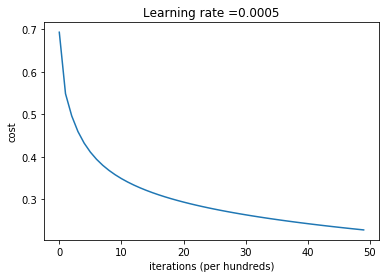

In [85]:
print("Car dataset")
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [86]:
print("Car dataset")
d= model(std_X_train, train_set_of_y, std_X_test, test_set_of_y, num_iterations= 2000, learning_rate= 0.005, print_cost= True)
print("")


Car dataset
Costs: 
0.6931471805599453
0.34832503598373044
0.29323468328455565
0.2633464913452111
0.24253059943103009
0.22635286068300065
0.21301379372361937
0.20161395404816623
0.1916401352231467
0.1827710242724725
0.1747909067232438
0.1675467811287168
0.16092519587059356
0.15483890800007094
0.14921879443083969
0.14400873568826805
0.13916226075501759
0.13464027463236447
0.13040947191888988
0.1264411962537478
train accuracy: 97.48549323017409 %
test accuracy: 89.59537572254335 %



Car dataset


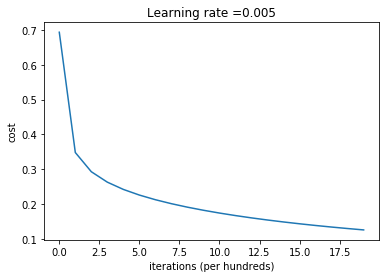

In [41]:
print("Car dataset")
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

### DNN

In [42]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters


In [43]:
#np.random.seed(3)
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.72642933 -0.27358579 -0.23620559 -0.47984616  0.38702206]
 [-1.0292794   0.78030354 -0.34042208  0.14267862 -0.11152182]
 [ 0.65387455 -0.92132293 -0.14418936 -0.17175433  0.50703711]
 [-0.49188633 -0.07711224 -0.39259022  0.01887856  0.26064289]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.55030959  0.57236185  0.45079536  0.25124717]
 [ 0.45042797 -0.34186393 -0.06144511 -0.46788472]
 [-0.13394404  0.26517773 -0.34583038 -0.19837676]]
b2 = [[0.]
 [0.]
 [0.]]


In [44]:
# GRADED FUNCTION: L_model_forward

# import the linear_activation_forward
# we added this from previous assignment to the utility file.
from dnn_utils_v2 import linear_activation_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    
    if L == 2:
        l = 1
        A_prev = A
        A, cache = linear_activation_forward(A_prev,parameters['W'+ str(l)],parameters['b'+ str(l)],"relu")
        caches.append(cache)

    else:
    # Use a for loop to replicate [LINEAR->RELU] (L-1) times
        for l in range(1, L):
        # A_prev represets the activation output of the previous layer 
            A_prev = A
        
        # Use the linear_activation_forward you had previously written (we import this function)
            A, cache = linear_activation_forward(A_prev,parameters['W'+ str(l)],parameters['b'+ str(l)],"relu")

        # keep track of the cache 
        # Add "cache" to the "caches" list
            caches.append(cache)
    
    # This is the last layer L which uses sigmoid activation function
    # Implement LINEAR -> SIGMOID. .
    AL, cache = linear_activation_forward(A,parameters['W'+str(L)],parameters['b'+ str(L)],"sigmoid")
    # Add "cache" to the "caches" list
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))
    return AL, caches

In [45]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [46]:
#np.random.seed(3)
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.72642933 -0.27358579 -0.23620559 -0.47984616  0.38702206]
 [-1.0292794   0.78030354 -0.34042208  0.14267862 -0.11152182]
 [ 0.65387455 -0.92132293 -0.14418936 -0.17175433  0.50703711]
 [-0.49188633 -0.07711224 -0.39259022  0.01887856  0.26064289]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.55030959  0.57236185  0.45079536  0.25124717]
 [ 0.45042797 -0.34186393 -0.06144511 -0.46788472]
 [-0.13394404  0.26517773 -0.34583038 -0.19837676]]
b2 = [[0.]
 [0.]
 [0.]]


In [47]:
# GRADED FUNCTION: L_model_forward

# import the linear_activation_forward
# we added this from previous assignment to the utility file.
from dnn_utils_v2 import linear_activation_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    
    if L == 2:
        l = 1
        A_prev = A
        A, cache = linear_activation_forward(A_prev,parameters['W'+ str(l)],parameters['b'+ str(l)],"relu")
        caches.append(cache)

    else:
    # Use a for loop to replicate [LINEAR->RELU] (L-1) times
        for l in range(1, L):
        # A_prev represets the activation output of the previous layer 
            A_prev = A
        
        # Use the linear_activation_forward you had previously written (we import this function)
            A, cache = linear_activation_forward(A_prev,parameters['W'+ str(l)],parameters['b'+ str(l)],"relu")

        # keep track of the cache 
        # Add "cache" to the "caches" list
            caches.append(cache)
    
    # This is the last layer L which uses sigmoid activation function
    # Implement LINEAR -> SIGMOID. .
    AL, cache = linear_activation_forward(A,parameters['W'+str(L)],parameters['b'+ str(L)],"sigmoid")
    # Add "cache" to the "caches" list
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))
    return AL, caches

In [48]:
X, parameters = L_model_forward_test_case()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.17007265 0.2524272 ]]
Length of caches list = 2


In [49]:
from dnn_utils_v2 import compute_cost

In [50]:
Y, AL = compute_cost_test_case()
print("cost = " + str(compute_cost(AL, Y)))

cost = 0.41493159961539694


In [51]:
# GRADED FUNCTION: L_model_backward

from dnn_utils_v2 import linear_activation_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    # use linear_activation_backward to get the derivatives
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,"sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        # use linear_activation_backward to get the derivatives
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)],current_cache,"relu")
        # save the derivatives into a grads dictionary
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] =  db_temp

    return grads

In [52]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]


In [53]:
from dnn_utils_v2 import update_parameters

In [54]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


In [55]:
# GRADED FUNCTION: L_layer_model


def L_layer_model(X, Y, layer_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layer_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
        
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

### Results for Deep NN

Cost after iteration 0: 0.646541
Cost after iteration 100: 0.416225
Cost after iteration 200: 0.355888
Cost after iteration 300: 0.332115
Cost after iteration 400: 0.290015
Cost after iteration 500: 0.283693
Cost after iteration 600: 0.265475
Cost after iteration 700: 0.269672
Cost after iteration 800: 0.248073
Cost after iteration 900: 0.224796
Cost after iteration 1000: 0.200861
Cost after iteration 1100: 0.162487
Cost after iteration 1200: 0.147610
Cost after iteration 1300: 0.134080
Cost after iteration 1400: 0.128511
Cost after iteration 1500: 0.114763
Cost after iteration 1600: 0.108451
Cost after iteration 1700: 0.102095
Cost after iteration 1800: 0.095662
Cost after iteration 1900: 0.090710
Cost after iteration 2000: 0.085121
Cost after iteration 2100: 0.080811
Cost after iteration 2200: 0.076973
Cost after iteration 2300: 0.073748
Cost after iteration 2400: 0.071468


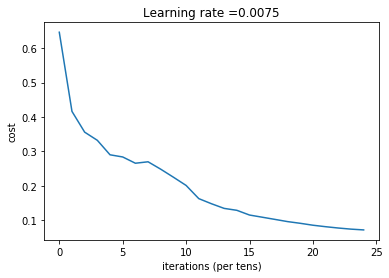

In [57]:
layer_dims = [12288,20,7,5,1]
model_parameters = L_layer_model(std_X_train, train_set_of_y, layer_dims, num_iterations = 2500, print_cost = True)

In [60]:
def predict(X, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
      
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # round the probabilities to get the class labels.
    p = np.round(probas)
        
    return p

In [63]:
predictions_train = predict(std_X_train, model_parameters)
m_train = train_set_of_y.shape[1]
print("Train Accuracy: "  + str(np.sum((predictions_train == train_set_of_y)/m_train)))
m_test = test_set_of_y.shape[1]
predictions_test = predict(std_X_test, model_parameters)
print("Test Accuracy: "  + str(np.sum((predictions_test == test_set_of_y)/m_test)))

Train Accuracy: 0.9864603481624761
Test Accuracy: 0.890173410404624


Cost after iteration 0: 0.706606
Cost after iteration 100: 0.376183
Cost after iteration 200: 0.309636
Cost after iteration 300: 0.266480
Cost after iteration 400: 0.218903
Cost after iteration 500: 0.206720
Cost after iteration 600: 0.204804
Cost after iteration 700: 0.111973
Cost after iteration 800: 0.115337
Cost after iteration 900: 0.074727
Cost after iteration 1000: 0.059304
Cost after iteration 1100: 0.046337
Cost after iteration 1200: 0.037163
Cost after iteration 1300: 0.030488
Cost after iteration 1400: 0.025035
Cost after iteration 1500: 0.021230
Cost after iteration 1600: 0.018518
Cost after iteration 1700: 0.016503
Cost after iteration 1800: 0.014954
Cost after iteration 1900: 0.013741
Cost after iteration 2000: 0.012769
Cost after iteration 2100: 0.011976
Cost after iteration 2200: 0.011319
Cost after iteration 2300: 0.010767
Cost after iteration 2400: 0.010298


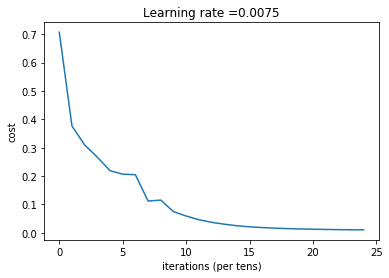

In [66]:
layer_dims = [12288,40,7,5,1]
model_parameters = L_layer_model(std_X_train, train_set_of_y, layer_dims, num_iterations = 2500, print_cost = True)

In [69]:
predictions_train = predict(std_X_train, model_parameters)
m_train = train_set_of_y.shape[1]
print("Train Accuracy: "  + str(np.sum((predictions_train == train_set_of_y)/m_train)))
m_test = test_set_of_y.shape[1]
predictions_test = predict(std_X_test, model_parameters)
print("Test Accuracy: "  + str(np.sum((predictions_test == test_set_of_y)/m_test)))

Train Accuracy: 0.9922630560928436
Test Accuracy: 0.8959537572254332
